# Die Normalverteilung

Die Normalverteilung ist die wichtigste Verteilung in der Statistik und wir grundlegend für die statistische Modellierung in diesem Kurs sein.

Zuerst wollen wir uns eine Übersicht über diese Verteilung verschaffen und dann die wichtigsten Eigenschaften kennenlernen.
Bevor wir uns die Normalverteilung genauer anschauen, werden wir ein bisschen ausholen, um die Grundlagen aus dem Statistik-Kurs in Erinnerung zu rufen.

## Diskrete Verteilungen

## The Normal Distribution

The normal distribution is a continuous probability distribution. It is also called the Gaussian distribution. The probability density function (pdf) of the normal distribution is given by:

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}\\
$$

where $\mu$ is the mean and $\sigma$ is the standard deviation. The normal distribution is symmetric around the mean $\mu$. The standard normal distribution has $\mu = 0$ and $\sigma = 1$.

Instead of writing the density function every time we want to refer to the normal distribution, we use the notation $X \sim N(\mu, \sigma^2)$ to denote that the random variable $X$ has a normal distribution with mean $\mu$ and variance $\sigma^2$.

$$
X \sim N(\mu, \sigma^2) \\
E(X) = \mu \\
Var(X) = \sigma^2 \\
SD(X) = \sqrt{\sigma^2} = \sigma
$$

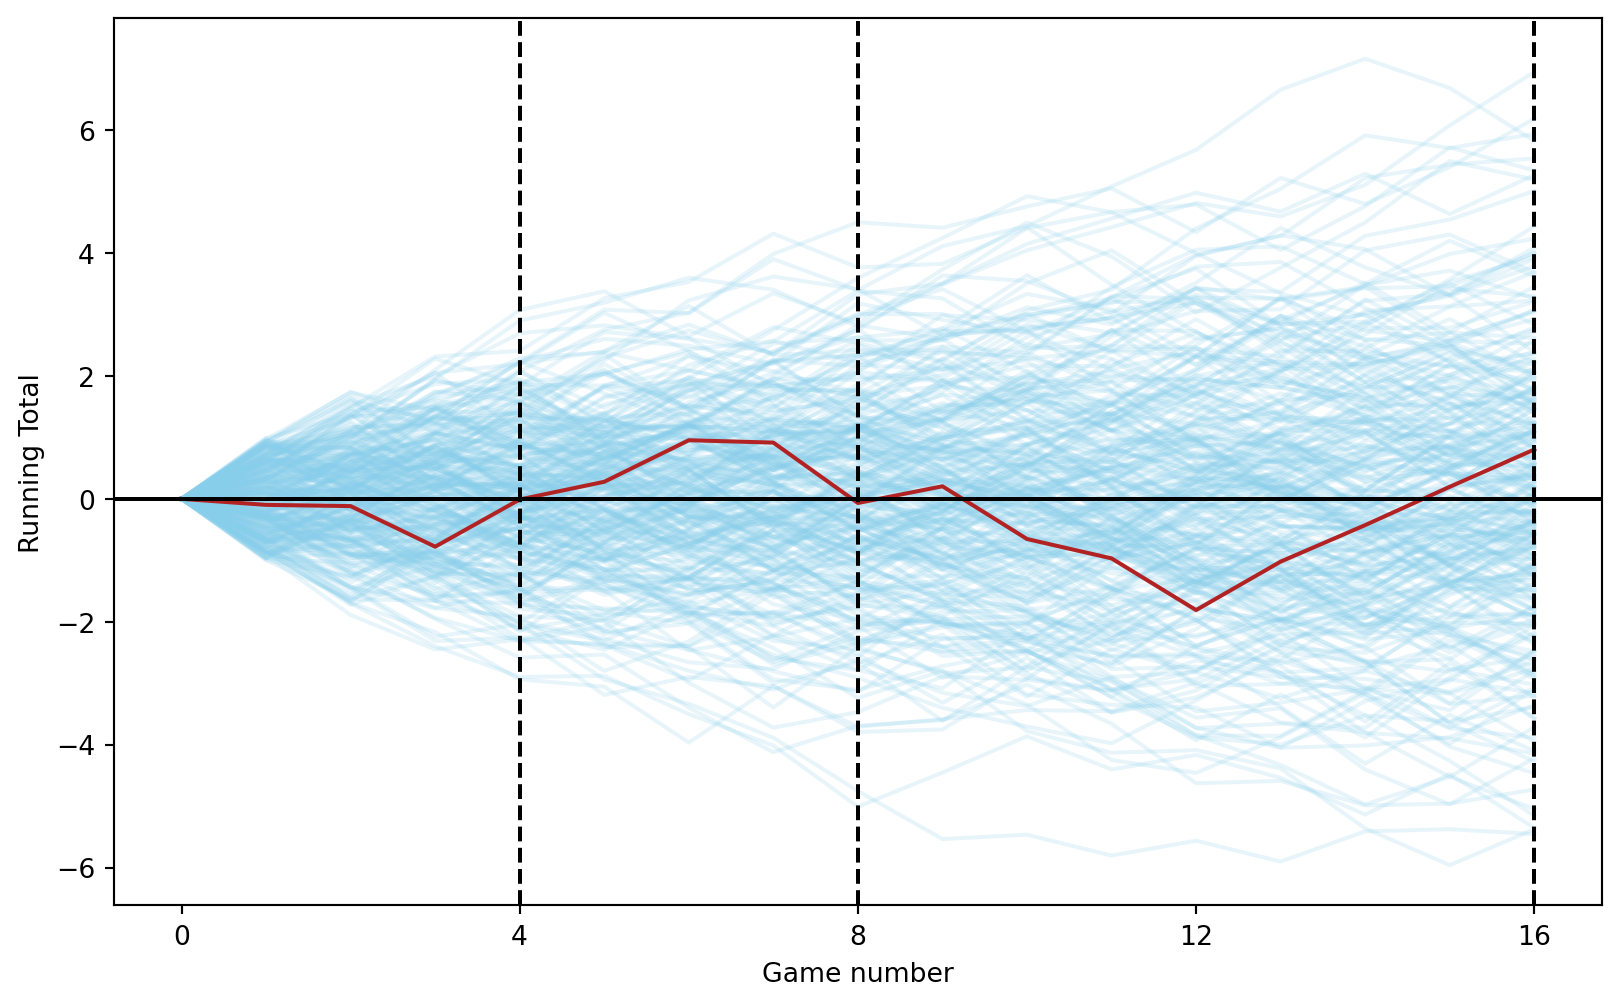

In [1]:
# | code-fold: true

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

players_n = 300
games_n = 16

# Create a DataFrame similar to expand_grid in R
unif_games = pd.DataFrame(
    np.array(
        np.meshgrid(
            np.arange(1, games_n + 1),
            np.arange(1, players_n + 1)
        )).T.reshape(-1, 2),
    columns=['game', 'player']
)

# Add result column with random uniform values between -1 and 1
unif_games['result'] = np.random.uniform(-1, 1, size=len(unif_games))

# Add initial values for each player
initial_values = pd.DataFrame(
    {'player': np.arange(1, players_n + 1), 'game': 0, 'result': 0})
unif_games = pd.concat([unif_games, initial_values])

# Sort values and calculate running total for each player
unif_games = unif_games.sort_values(['player', 'game'])
unif_games['running_total'] = unif_games.groupby('player')['result'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
for player in unif_games['player'].unique():
    player_data = unif_games[unif_games['player'] == player]
    plt.plot(player_data['game'], player_data['running_total'],
             color='skyblue', alpha=0.2)

# First player
player_data = unif_games[unif_games['player'] == 1]
plt.plot(player_data['game'], player_data['running_total'],
         color='firebrick', label='Player 1')

plt.axhline(0, color='black')

for mark in [4, 8, 16]:
    plt.axvline(x=mark, linestyle='--', color='black')

plt.xlabel('Game number')
plt.ylabel('Running Total')
plt.xticks([0, 4, 8, 12, 16])
plt.show()

## The Multivariate Normal Distribution

The multivariate normal distribution is a generalization of the one-dimensional normal distribution to higher dimensions. The probability density function (pdf) of the multivariate normal distribution is given by:

$$
f(x) = \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}} e^{-\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu)}\\
$$

where $\mu$ is the mean vector and $\Sigma$ is the covariance matrix. The multivariate normal distribution is symmetric around the mean $\mu$. The standard multivariate normal distribution has $\mu = 0$ and $\Sigma = I$, where $I$ is the identity matrix.


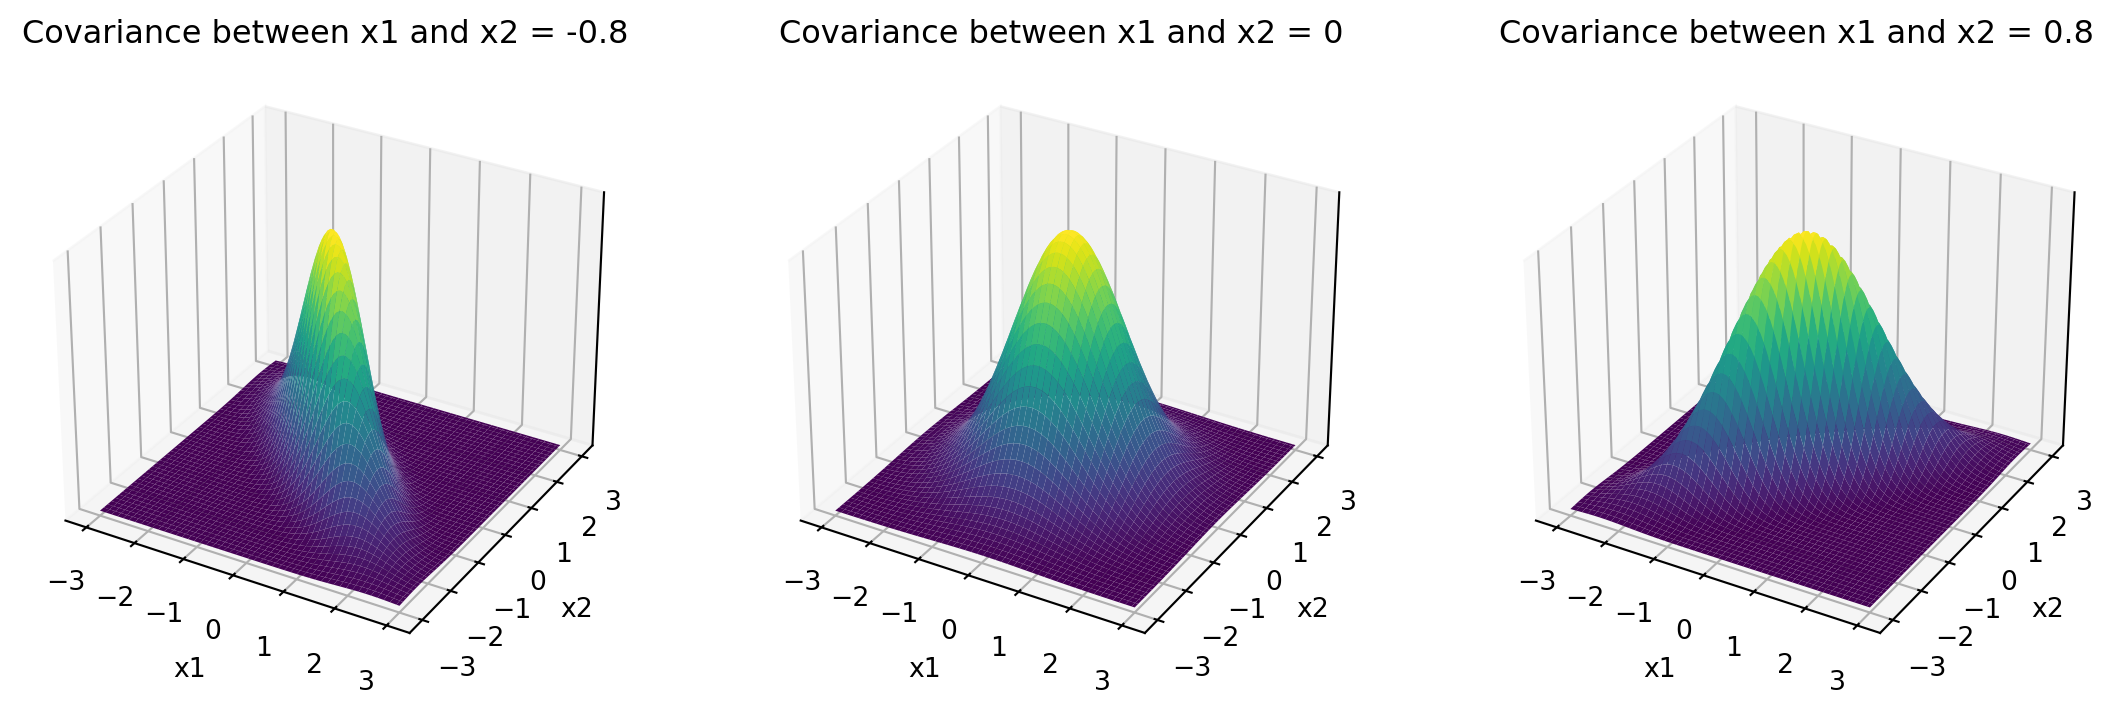

In [2]:
#| code-fold: true

# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
# plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14, 6
fig = plt.figure()
 
# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]
 
# Setting mean of the distributino 
# to be at (0,0)
mean = np.array([0,0])
 
# Storing density function values for 
# further analysis
pdf_list = []
 
# Iterating over different covariance values
for idx, val in enumerate(cov_val):
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating a meshgrid complacent with
    # the 3-sigma boundary
    mean_1, mean_2 = mean[0], mean[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]
     
    x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
    y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
    X, Y = np.meshgrid(x,y)
     
    # Generating the density function
    # for each point in the meshgrid
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
     
    # Plotting the density function values
    key = 131+idx
    ax = fig.add_subplot(key, projection = '3d')
    ax.plot_surface(X, Y, pdf, cmap = 'viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {val}')
    pdf_list.append(pdf)
    ax.axes.zaxis.set_ticks([])


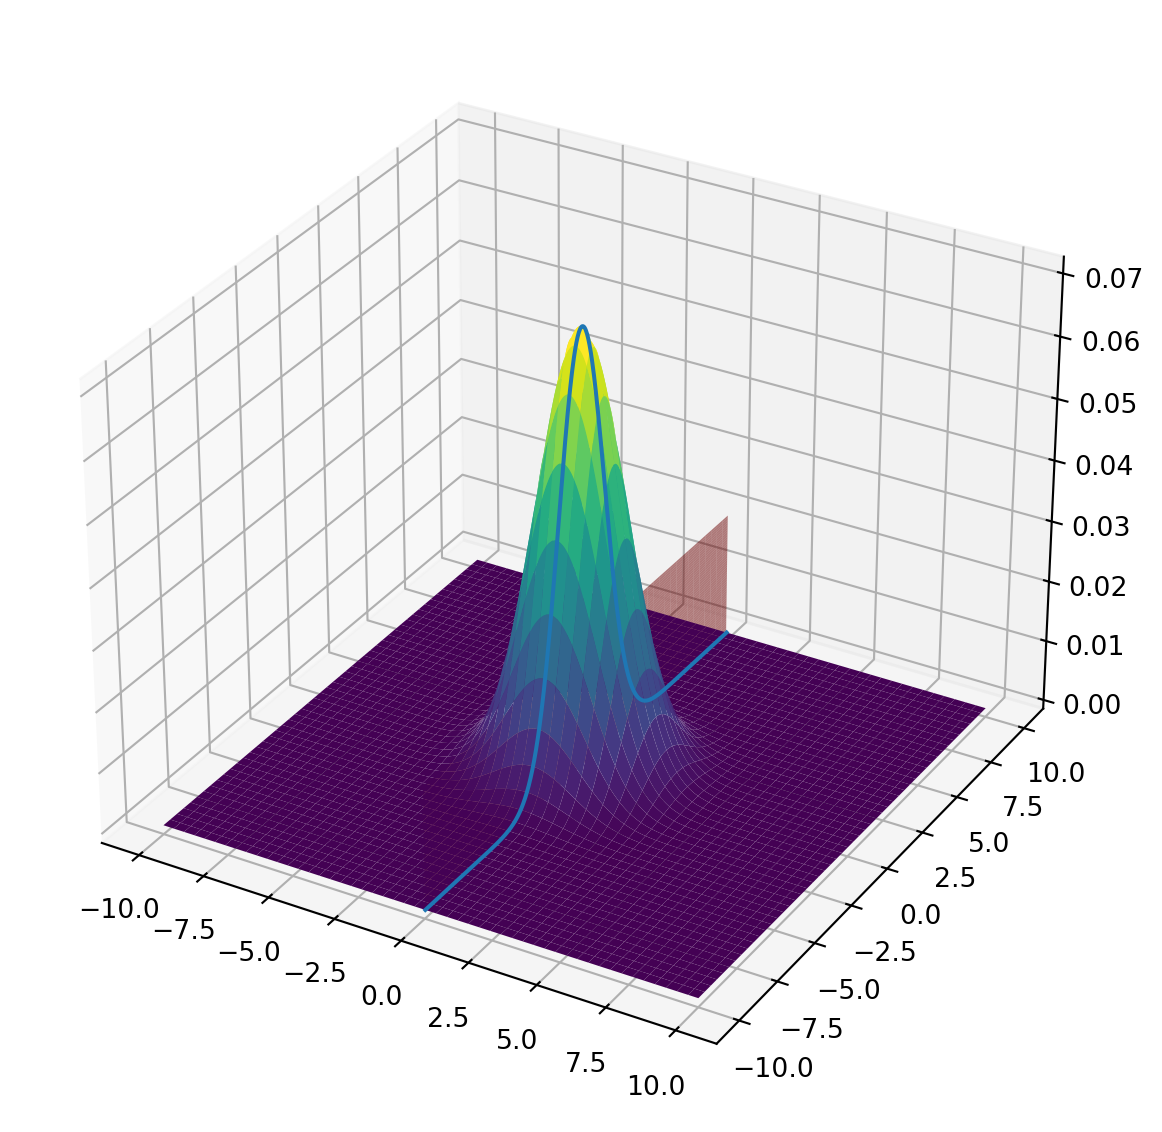

In [3]:
#| code-fold: true

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters to set for Gaussian distribution
mu_x = 0
sigma_x = np.sqrt(5)
mu_y = 0
sigma_y = np.sqrt(5)

# Create grid and multivariate normal
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x, y)
MVN = multivariate_normal(mean=[mu_x, mu_y], cov=[[sigma_x, 0], [0, sigma_y]])

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = MVN.pdf(pos)

# Create plane
x_p = 0
y_p = np.linspace(-10, 10, 500)
z_p = np.linspace(0, 0.02, 500)
Y_p, Z_p = np.meshgrid(y_p, z_p)

# Finding closest idx values of X mesh to x_p
tol = 1e-4
idx_x_p = (np.where(x < x_p+tol) and np.where(x > x_p-tol))[0][0]
# Select the corresponding values of X, Y, Z (carefully switch X and Y)
x_c, y_c, z_c = Y[idx_x_p], X[idx_x_p], Z[idx_x_p]

# Plot
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, zorder=0)
ax.plot_surface(x_p, Y_p, Z_p, color='r', linewidth=0, alpha=0.5, zorder=5)
ax.plot(x_c, y_c, z_c, zorder=10)

plt.tight_layout()

In [4]:
#| code-fold: true

SMVN = multivariate_normal(mean=[0, 0], cov=[[1,0.5],[0.5,1]])

a = np.array([-5, 0, 5])
b = np.array([-5, 0, 5])

A, B = np.meshgrid(a, b)
print(A)
print(B)


[[-5  0  5]
 [-5  0  5]
 [-5  0  5]]
[[-5 -5 -5]
 [ 0  0  0]
 [ 5  5  5]]


In [5]:
#| code-fold: true

pos = np.empty(A.shape + (2,))
pos[:, :, 0] = A
pos[:, :, 1] = B

SMVN.cdf(pos)

array([[8.24708643e-10, 2.86239218e-07, 2.86651572e-07],
       [2.86239218e-07, 3.33333333e-01, 5.00000000e-01],
       [2.86651572e-07, 5.00000000e-01, 9.99999428e-01]])

In [6]:
#| code-fold: true

SMVN.pdf([-1, -1])
SMVN.pdf([0, -1])

0.09435389770895924

In [7]:
#| code-fold: true

tmp = np.array(
    np.meshgrid(
        np.arange(1, games_n + 1),
        np.arange(1, players_n + 1)
    )
)

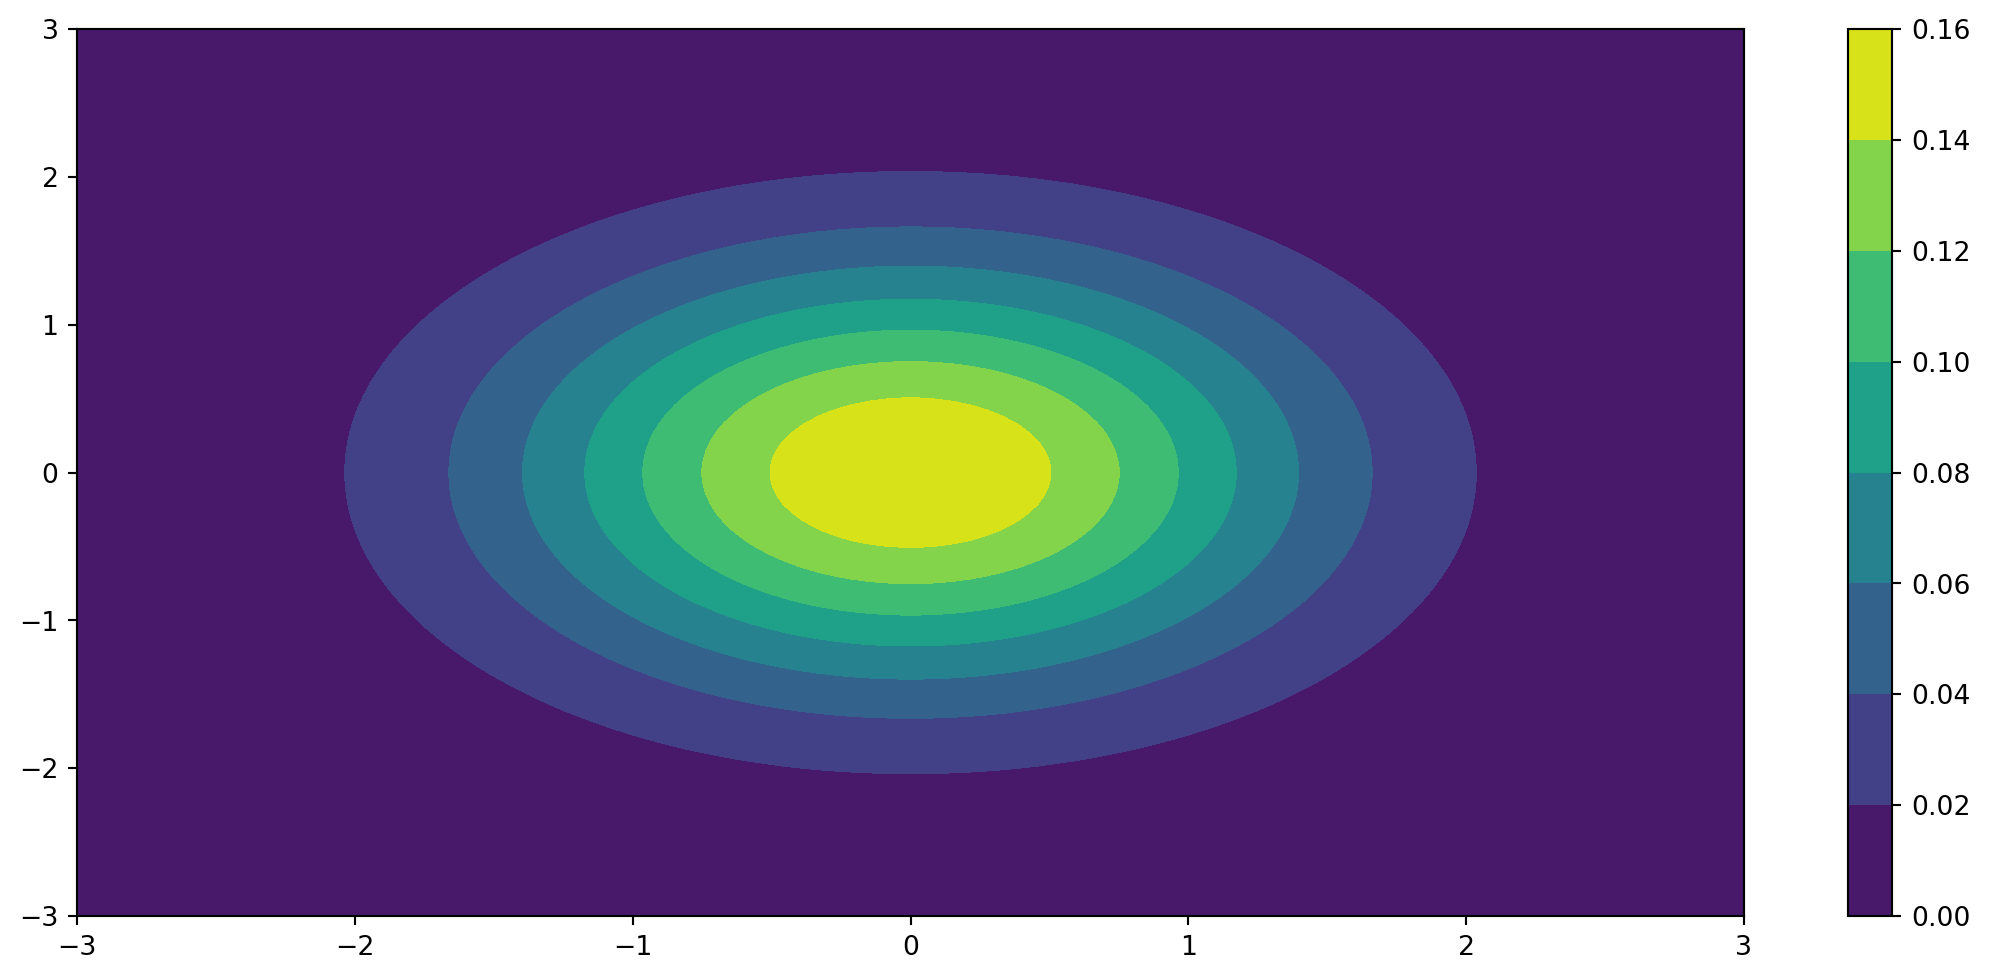

In [8]:
#| code-fold: true

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the mean and covariance matrix for the bivariate normal distribution
mean = np.array([0, 0])
cov = np.array([[1, 0], [0, 1]])

# Create a grid of values
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Compute the bivariate normal probabilities over the grid
rv = multivariate_normal(mean, cov)
Z = rv.pdf(np.dstack((X, Y)))

# Plot the bivariate normal probabilities
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

In [9]:
#| code-fold: true

import numpy as np
from scipy.stats import multivariate_normal
from scipy.integrate import dblquad

# Define the mean and covariance matrix for the bivariate normal distribution
mean = np.array([0, 0])
cov = np.array([[1, 0], [0, 1]])

# Define the bivariate normal distribution
rv = multivariate_normal(mean, cov)

# Define the limits of the interval
x_interval = [0, 1]
y_interval = [0, 1]

# Define the function to integrate
func = lambda x, y: rv.pdf([x, y])

# Compute the probability over the interval using numerical integration
prob, _ = dblquad(func, x_interval[0], x_interval[1], lambda x: y_interval[0], lambda x: y_interval[1])

print(f"The probability over the interval is {prob}")

The probability over the interval is 0.11651623566859808


In [10]:
#| code-fold: true
def discretize_bivariate_normal(mean, cov, x_intervals, y_intervals):
    # Define the bivariate normal distribution
    rv = multivariate_normal(mean, cov)

    grid = np.array(
        np.meshgrid(
            np.array(x_intervals + [np.inf]),
            np.array(y_intervals + [np.inf])
        )
    ).T.reshape(-1, 2)

    # Compute the probability over the interval using numerical integration

    x_int = [-np.inf] + x_intervals + [np.inf]
    y_int = [-np.inf] + y_intervals + [np.inf]

    probs = np.zeros((len(x_int) - 1, len(y_int) - 1))


    for i in range(len(x_int) - 1):
        for j in range(len(y_int) - 1):
            xb_l, xb_u = x_int[i:i+2]
            yb_l, yb_u = y_int[j:j+2]

            p1 = rv.cdf([xb_u, yb_l]) if xb_u != - \
                np.inf and yb_l != -np.inf else 0
            p2 = rv.cdf([xb_l, yb_u]) if xb_l != - \
                np.inf and yb_u != -np.inf else 0
            p3 = rv.cdf([xb_l, yb_l]) if xb_l != - \
                np.inf and yb_l != -np.inf else 0

            prob = rv.cdf([xb_u, yb_u]) - p1 - p2 + p3
            probs[i, j] = prob

    return grid, probs


gr, pr = discretize_bivariate_normal(
    np.array([0, 0]),
    np.array([[1, 0], [0, 1]]),
    [-1, 0],
    [-1, 0]
)

In [11]:
# This can be done using the cumulative sum and subtracting the previous value
# by grouping on the slower changing variable

df = pd.DataFrame(gr, columns=['x', 'y'])
df['prob'] = pr.flatten()
df

,x,y,prob
0,-1.0,-1.0,0.025171
1,-1.0,0.0,0.054156
2,-1.0,inf,0.079328
3,0.0,-1.0,0.054156
4,0.0,0.0,0.116516
5,0.0,inf,0.170672
6,inf,-1.0,0.079328
7,inf,0.0,0.170672
8,inf,inf,0.250000


In [12]:

# # Define the bivariate normal distribution
# rv1 = multivariate_normal(np.array([0, 0]), np.array([[1, 0], [0, 1]]))

# # rv1.cdf(np.array([[0, 0], [1, 1], [np.inf, np.inf]]))
# rv1.cdf(tmp)

# import pandas as pd

# df = pd.DataFrame(tmp, columns=['x', 'y'])
# df["cdf"] = rv1.cdf(tmp)
# # df["cdf_diff"] = df["cdf"].diff().fillna(df["cdf"])
# df

In [13]:
# df["cdf_d_gr"] = df.groupby('x')["cdf"].transform("diff").fillna(df["cdf"])
# df["cdf_d_gr_cs"] = df.groupby('x')["cdf_d_gr"].transform("cumsum")
# df

In [14]:
# np.array(
#     np.meshgrid(
#         np.array([1, 2, 3]),
#         np.array([4, 5])
#     )
# )